In [ ]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv"
data = pd.read_csv(url)

# Display basic info
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  7430 non-null   int64  
 1   id        7430 non-null   int64  
 2   read12    7430 non-null   float64
 3   math12    7430 non-null   float64
 4   female    7430 non-null   int64  
 5   asian     7430 non-null   int64  
 6   hispan    7430 non-null   int64  
 7   black     7430 non-null   int64  
 8   motheduc  7430 non-null   float64
 9   fatheduc  7430 non-null   float64
 10  lfaminc   7430 non-null   float64
 11  hsgrad    5970 non-null   float64
 12  cathhs    7430 non-null   int64  
 13  parcath   7430 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 812.8 KB


,rownames,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath
0,1,124902,61.41,49.77,0,0,0,0,14.0,12.0,10.30895,1.0,0,1
1,2,124915,58.34,59.84,0,0,0,0,14.0,14.0,10.30895,1.0,0,1
2,3,124916,59.33,50.38,1,0,0,0,14.0,11.0,10.30895,1.0,0,1
3,4,124932,49.59,45.03,1,0,0,0,12.0,14.0,10.30895,1.0,0,1
4,5,124944,57.62,54.26,1,0,0,0,12.0,12.0,10.65726,1.0,0,1


In [ ]:
# Check missing values
print(data.isnull().sum())

# Drop or fill missing data (example)
data = data.dropna()

# Check data types
print(data.dtypes)


rownames       0
id             0
read12         0
math12         0
female         0
asian          0
hispan         0
black          0
motheduc       0
fatheduc       0
lfaminc        0
hsgrad      1460
cathhs         0
parcath        0
dtype: int64
rownames      int64
id            int64
read12      float64
math12      float64
female        int64
asian         int64
hispan        int64
black         int64
motheduc    float64
fatheduc    float64
lfaminc     float64
hsgrad      float64
cathhs        int64
parcath       int64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled)

# View results
print(data['cluster'].value_counts())


cluster
2    2159
1    2111
0    1700
Name: count, dtype: int64


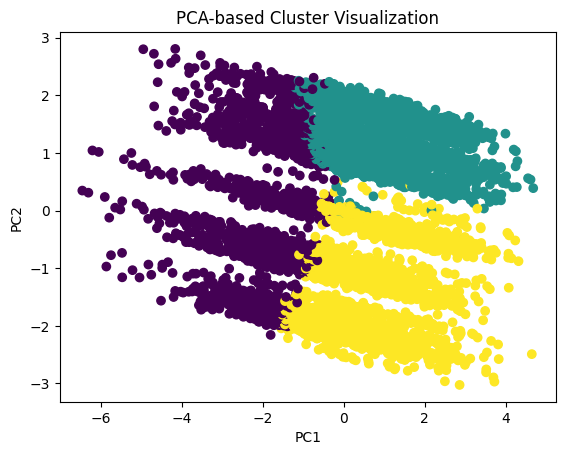

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Plot clusters
plt.scatter(pca_result[:,0], pca_result[:,1], c=data['cluster'])
plt.title("PCA-based Cluster Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
